In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Cargar datos 
archivo_excel = 'Columna.csv'
data = pd.read_csv(archivo_excel)
data

,text_punc_num
0,la peor delincuencia no es el de las calles e...
1,la policaa nacional rechaza y condena el acto...
2,ayer en villavicencio mientras daba una charl...
3,cuando va a colocar una unidad movil de maner...
4,tal vez no sea buena idea dejarse asesorar po...
...,...
7900,el manido chiste de la guitarra y la utilizac...
7901,el manido chiste de la guitarra y la utilizac...
7902,extradeportes asisergio lopez mediocentro y ...
7903,francisco chahuan hoy llego a la moneda con u...


In [2]:
replacements = {
    'é': 'e',
    'ñ': 'n',
    'í': 'i',
    'ó': 'o',
    'á': 'a',
    'ú': 'u',
    'ã³':'o',
    'ðÿ':' ',
    'š½ ':'si'
    # Añade más reemplazos según sea necesario
}

for original, replacement in replacements.items():
    data['text_punc_num'] = data['text_punc_num'].str.replace(original, replacement)

In [3]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Descargar las stopwords si es necesario
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Preprocesamiento del texto
def preprocesar(texto):

    if isinstance(texto, float):
        return []
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar caracteres no alfabéticos
    texto = re.sub(r'[^a-záéíóúñ]+', ' ', texto)
    # Tokenización
    palabras = word_tokenize(texto)
    # Eliminar stopwords
    palabras = [palabra for palabra in palabras if palabra not in stopwords.words('spanish')]
    # Lematización (opcional)
#     lemmatizer = WordNetLemmatizer()
#     palabras = [lemmatizer.lemmatize(palabra) for palabra in palabras]
    return palabras

# Ejemplo de uso
# texto_ejemplo = "Este es un ejemplo de texto para preprocesar."
# texto_procesado = preprocesar(texto_ejemplo)
# print(texto_procesado)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/miguelsamaniego/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/miguelsamaniego/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/miguelsamaniego/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
data['texto_procesado'] = data['text_punc_num'].apply(preprocesar)
data['texto_procesado']

0       [peor, delincuencia, calles, prensa, roba, ver...
1       [policaa, nacional, rechaza, condena, acto, de...
2       [ayer, villavicencio, mientras, daba, charla, ...
3       [va, colocar, unidad, movil, manera, permanent...
4       [tal, vez, buena, idea, dejarse, asesorar, exm...
                              ...                        
7900    [manido, chiste, guitarra, utilizacion, delinc...
7901    [manido, chiste, guitarra, utilizacion, delinc...
7902    [extradeportes, asisergio, lopez, mediocentro,...
7903    [francisco, chahuan, hoy, llego, moneda, guita...
7904    [solo, delito, podido, probar, aa, n, detracto...
Name: texto_procesado, Length: 7905, dtype: object

In [5]:
# Suponiendo que 'data' es tu DataFrame y 'texto_procesado' la columna con los textos
# ...

# Si los textos están en forma de listas de palabras, conviértelos a cadenas
#data['texto_procesado'] = data['texto_procesado'].apply(lambda x: ' '.join(x))


In [9]:
from gensim.corpora import Dictionary
from gensim.models import HdpModel

# Suponiendo que 'data' es tu DataFrame y 'texto_procesado' la columna con los textos
# Crear un diccionario y corpus para HDP
diccionario = Dictionary(data['texto_procesado'])
corpus = [diccionario.doc2bow(texto) for texto in data['texto_procesado']]


In [10]:
# Crear el modelo HDP
hdp = HdpModel(corpus=corpus, id2word=diccionario)


In [11]:
# Mostrar los temas y las palabras clave
for i, topic in enumerate(hdp.print_topics(num_topics=-1, num_words=10)):
    print(f"Tema {i + 1}: {topic}")


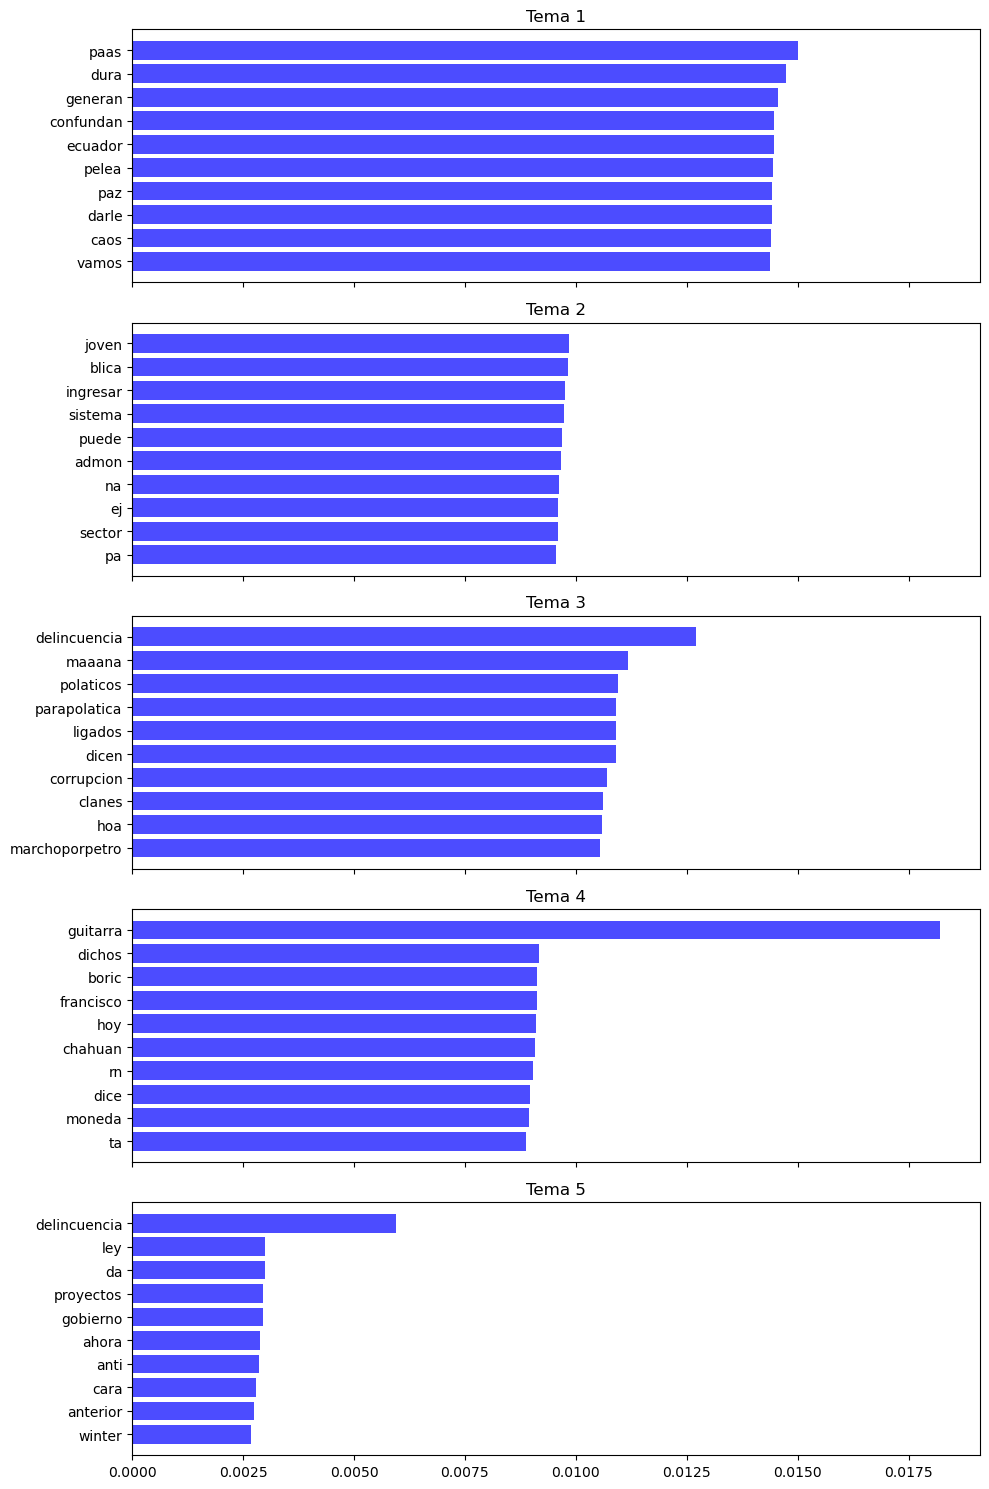

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Número de temas y palabras clave a visualizar
num_temas = 5
num_palabras_clave = 10

# Obtener los temas del modelo HDP
temas_hdp = hdp.show_topics(num_topics=num_temas, num_words=num_palabras_clave, formatted=False)

fig, axes = plt.subplots(num_temas, 1, figsize=(10, num_temas * 3), sharex=True)
axes = axes.flatten()

for i, tema in enumerate(temas_hdp):
    palabras, pesos = zip(*[(word, weight) for word, weight in tema[1]])
    axes[i].barh(palabras, pesos, align='center', color='blue', alpha=0.7)
    axes[i].set_title(f'Tema {i + 1}')
    axes[i].invert_yaxis()

plt.tight_layout()
plt.show()


Cada gráfico de barras representa las palabras más significativas para cada tópico identificado por el modelo HDP. Las barras más largas indican una mayor importancia o frecuencia de la palabra dentro de ese tópico específico. Al igual que en LDA y LSA, estas palabras son útiles para interpretar los temas subyacentes que el modelo ha descubierto.

Tema 1: Incluye términos como "paas", "dura", "generan", lo que puede sugerir un tópico relacionado con conflictos o desafíos.
Tema 2: Contiene términos como "joven", "blíca", "ingresar", que podrían estar relacionados con temas de educación o desarrollo juvenil.
Tema 3: Incluye palabras como "delincuencia", "maaana", "polaticos", que pueden indicar un tópico centrado en la política y problemas sociales.
Tema 4 y Tema 5: Los términos como "guitarra", "dichos", "francisco" en el Tema 4 y "delincuencia", "ley", "proyectos" en el Tema 5 sugieren temas relacionados con cultura o música para el Tema 4 y legislación o políticas públicas para el Tema 5.